In [22]:
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # specify the path of the folder containing "file_name" :
    path_to_file = '/content/gdrive/My Drive/Colab Notebooks/5153 group project/'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/5153 group project/
/content/gdrive/My Drive/Colab Notebooks/5153 group project


In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


## **Data Preprocessing**

In [259]:
df = pd.read_csv("fake_job_postings.csv")

In [260]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [261]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [262]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [263]:
# dataset balance check

df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

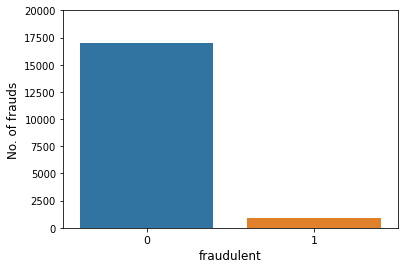

In [264]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x = 'fraudulent')
plt.xlabel("fraudulent", fontsize=12)
plt.ylabel("No. of frauds", fontsize=12)
plt.ylim(0,20000)
plt.xticks([0,1],['0','1'], fontsize=11)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

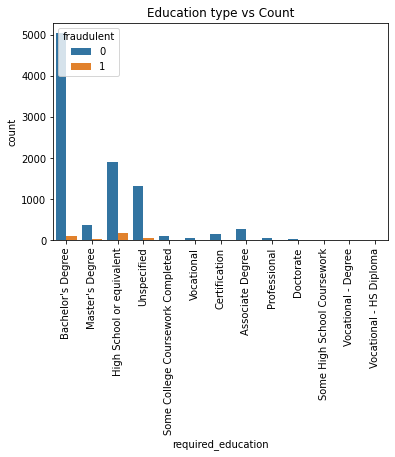

In [265]:
sns.countplot(x="required_education",data=df, hue = "fraudulent")
plt.title("Education type vs Count")
plt.xticks(rotation=90)

In [266]:
# clean education

df['required_education'] = df['required_education'].replace({'Vocational':'Others',
                             'Certification':'Others',
                             'Associate Degree':'Others',
                             'Professional':'Others',
                             'Some High School Coursework':'Others',
                             'Some College Coursework Completed':'Others',
                             'Vocational - Degree':'Others',
                             'Vocational - HS Diploma':'Others',
                             "Master's Degree":"Master's Degree and Doctorate",   
                             'Doctorate':"Master's Degree and Doctorate",
                             "Bachelor's Degree" :"Bachelor's Degree",
                             "Bachelor's Degree" :"Bachelor's Degree",
                             'High School or equivalent':'Others',
                             np.nan:'Unspecified'})

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

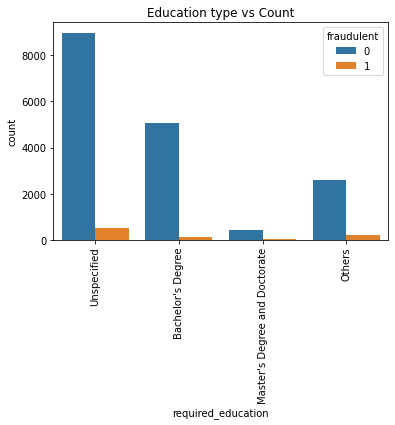

In [267]:
sns.countplot(x="required_education",data=df, hue = "fraudulent")
plt.title("Education type vs Count")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

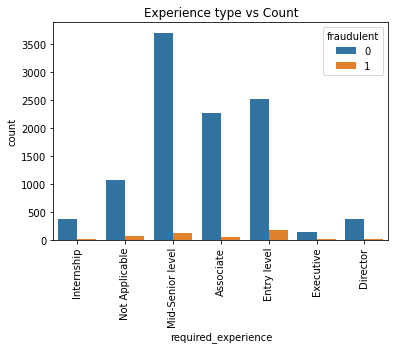

In [268]:
sns.countplot(x="required_experience",data=df, hue = "fraudulent")
plt.title("Experience type vs Count")
plt.xticks(rotation=90)

In [269]:
# clean experience

df['required_experience'] = df['required_experience'].replace({'Internship':'Internship/Entry level/Unspecified',
                             'Entry level':'Internship/Entry level/Unspecified',
                             'Not Applicable':'Internship/Entry level/Unspecified',
                             'Mid-Senior level':'Mid-Senior level',
                             'Associate':'Mid-Senior level',
                             'Executive':'Executive',
                             'Director':'Director',
                             np.nan:'Internship/Entry level/Unspecified'})

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

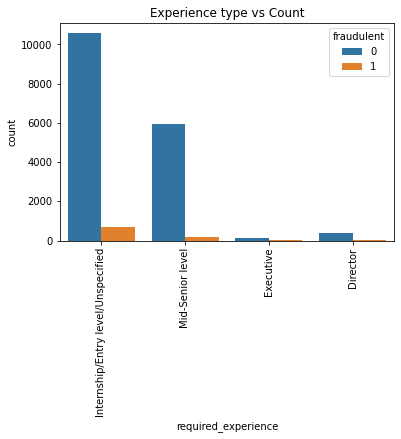

In [270]:
sns.countplot(x="required_experience",data=df, hue = "fraudulent")
plt.title("Experience type vs Count")
plt.xticks(rotation=90)

In [271]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience        0
required_education         0
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [272]:
# clean employment type

df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [273]:
df['employment_type'] = df['employment_type'].fillna('missing')
df.loc[df['employment_type'].str.contains('Full-time',case=False), 'employment_type'] = 'ft'
df.loc[df['employment_type'].str.contains('Contract',case=False), 'employment_type'] = 'non_ft'
df.loc[df['employment_type'].str.contains('Part-time',case=False), 'employment_type'] = 'non_ft'
df.loc[df['employment_type'].str.contains('Temporary',case=False), 'employment_type'] = 'non_ft'
df.loc[df['employment_type'].str.contains('Other',case=False), 'employment_type'] = 'non_ft'
df['employment_type'].value_counts()

ft         11620
missing     3471
non_ft      2789
Name: employment_type, dtype: int64

In [274]:
#replace NAN with string
df = df.fillna('zero')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,zero,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,zero,0,1,0,non_ft,Internship/Entry level/Unspecified,Unspecified,zero,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,zero,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,ft,Internship/Entry level/Unspecified,Unspecified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",zero,zero,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,zero,0,1,0,missing,Internship/Entry level/Unspecified,Unspecified,zero,zero,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,zero,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,ft,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",zero,zero,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,ft,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [275]:
# combine title, company_profile, description, requirements, benefits, industry and function for text processing

df['text']=df['title']+df['company_profile']+df['description']+df['requirements']+df['benefits']+df['industry']+df['function']

# company_profile, description, requirements, benefits, industry and function are combined for text processing. drop these variables in dataset

df=df.drop(['title','company_profile','description','requirements','benefits','industry','function'],1)

# remove variables not used in the analysis: department, salary_range, location

df=df.drop(['department','salary_range','location'],1)

df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,text
0,1,0,1,0,non_ft,Internship/Entry level/Unspecified,Unspecified,0,"Marketing InternWe're Food52, and we've create..."
1,2,0,1,0,ft,Internship/Entry level/Unspecified,Unspecified,0,Customer Service - Cloud Video Production90 Se...
2,3,0,1,0,missing,Internship/Entry level/Unspecified,Unspecified,0,Commissioning Machinery Assistant (CMA)Valor S...
3,4,0,1,0,ft,Mid-Senior level,Bachelor's Degree,0,Account Executive - Washington DCOur passion f...
4,5,0,1,1,ft,Mid-Senior level,Bachelor's Degree,0,Bill Review ManagerSpotSource Solutions LLC is...


In [276]:
#import topic modeling features and missing values features
missing_values= pd.read_csv("missingvalues.csv")

# combine all features

data=pd.concat([missing_values,df],axis=1)

data

,job_id,miss.job_id,miss.title,miss.location,miss.department,miss.salary_range,miss.company_profile,miss.description,miss.requirements,miss.benefits,...,miss.fraudulent,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,text
0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,non_ft,Internship/Entry level/Unspecified,Unspecified,0,"Marketing InternWe're Food52, and we've create..."
1,2,0,0,0,0,1,0,0,0,0,...,0,2,0,1,0,ft,Internship/Entry level/Unspecified,Unspecified,0,Customer Service - Cloud Video Production90 Se...
2,3,0,0,0,1,1,0,0,0,1,...,0,3,0,1,0,missing,Internship/Entry level/Unspecified,Unspecified,0,Commissioning Machinery Assistant (CMA)Valor S...
3,4,0,0,0,0,1,0,0,0,0,...,0,4,0,1,0,ft,Mid-Senior level,Bachelor's Degree,0,Account Executive - Washington DCOur passion f...
4,5,0,0,0,1,1,0,0,0,0,...,0,5,0,1,1,ft,Mid-Senior level,Bachelor's Degree,0,Bill Review ManagerSpotSource Solutions LLC is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,0,0,0,1,0,0,0,0,...,0,17876,0,1,1,ft,Mid-Senior level,Unspecified,0,Account Director - Distribution Vend is lookin...
17876,17877,0,0,0,0,1,0,0,0,0,...,0,17877,0,1,1,ft,Mid-Senior level,Bachelor's Degree,0,Payroll AccountantWebLinc is the e-commerce pl...
17877,17878,0,0,0,1,1,0,0,0,1,...,0,17878,0,0,0,ft,Internship/Entry level/Unspecified,Unspecified,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,0,0,0,1,1,1,0,0,0,...,0,17879,0,0,1,non_ft,Internship/Entry level/Unspecified,Others,0,Graphic DesignerzeroNemsia Studios is looking ...


In [277]:
# drop job_id from the dataset

data=data.drop(['job_id','miss.job_id'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [279]:
data.isnull().sum()

miss.title                   0
miss.location                0
miss.department              0
miss.salary_range            0
miss.company_profile         0
miss.description             0
miss.requirements            0
miss.benefits                0
miss.telecommuting           0
miss.has_company_logo        0
miss.has_questions           0
miss.employment_type         0
miss.required_experimence    0
miss.required_education      0
miss.industry                0
miss.function                0
miss.fraudulent              0
telecommuting                0
has_company_logo             0
has_questions                0
employment_type              0
required_experience          0
required_education           0
fraudulent                   0
text                         0
dtype: int64

In [281]:
# Adding Dummies to categorical features

data = pd.concat([data, pd.get_dummies(data.employment_type, prefix='employment')], axis=1)
data = pd.concat([data, pd.get_dummies(data.required_experience, prefix='experience')], axis=1)
data = pd.concat([data, pd.get_dummies(data.required_education, prefix='education')], axis=1)

# drop employment_type, required_experience, required_education, Role from the dataset
data=data.drop(['employment_type','required_experience','required_education'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 44 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   miss.title                                     17880 non-null  int64 
 1   miss.location                                  17880 non-null  int64 
 2   miss.department                                17880 non-null  int64 
 3   miss.salary_range                              17880 non-null  int64 
 4   miss.company_profile                           17880 non-null  int64 
 5   miss.description                               17880 non-null  int64 
 6   miss.requirements                              17880 non-null  int64 
 7   miss.benefits                                  17880 non-null  int64 
 8   miss.telecommuting                             17880 non-null  int64 
 9   miss.has_company_logo                          17880 non-null

## **Text processing**

In [283]:
#Load libraries
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [284]:
!pip install texthero==1.1.0 -q

     |████████████████████████████████| 1.5 MB 11.3 MB/s 
     |████████████████████████████████| 235 kB 40.5 MB/s 
     |████████████████████████████████| 749 kB 37.5 MB/s 


In [285]:
import texthero as hero

In [290]:
# noise removal-- remove numbers, stop word, urls, htmls, lowercase

text = pd.DataFrame(data.text, columns=['text'])
text ['remove_digits']=hero.preprocessing.remove_digits(text ['text'])
text ['remove_stopwords']=hero.remove_stopwords(text ['remove_digits'])
text ['remove_urls']=hero.remove_urls(text ['remove_stopwords'])
text ['remove_htmls']=hero.remove_html_tags(text ['remove_urls'])
text ['lowercase']=hero.lowercase(text ['remove_htmls'])
text ['whitespace']=hero.remove_whitespace(text ['lowercase'])
text ['punctuation']=hero.remove_punctuation(text ['whitespace'])

In [291]:
data['clean_text']=text ['punctuation']
data

,miss.title,miss.location,miss.department,miss.salary_range,miss.company_profile,miss.description,miss.requirements,miss.benefits,miss.telecommuting,miss.has_company_logo,...,employment_non_ft,experience_Director,experience_Executive,experience_Internship/Entry level/Unspecified,experience_Mid-Senior level,education_Bachelor's Degree,education_Master's Degree and Doctorate,education_Others,education_Unspecified,clean_text
0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,marketing internwe food52 created groundbr...
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,customer service cloud video production90 se...
2,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,commissioning machinery assistant cma valor s...
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,account executive washington dcour passion i...
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,bill review managerspotsource solutions llc gl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,account director distribution vend looking a...
17876,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,payroll accountantweblinc e commerce platform ...
17877,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,project cost control staff engineer cost con...
17878,0,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,graphic designerzeronemsia studios looking exp...


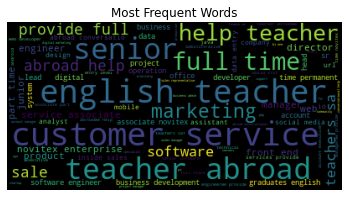

In [292]:
# Load libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud().generate(data['clean_text'].to_string())

# Display the generated image:
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

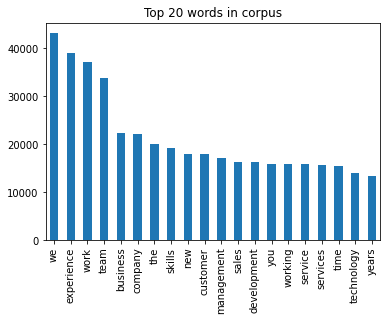

In [293]:
import matplotlib.pyplot as plt
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(data.loc[:, 'clean_text']).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=90, title="Top 20 words in corpus");
plt.show(block=True);

## **Model**

In [297]:
## Import Packages

from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [298]:
# explore is miss.xxx features are important
# models: - logistic regression (ZJ); naïve baysian (Mansi); random forest (ZJ); boosting-light GBM (Mansi); LSTM/CNN (ZJ); BERT (Mansi); Hierarchal clustering (ZJ, to explore if got time) 

X = data.text
y = data.fraudulent


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.30, random_state = 0)

print('Shape of X_train =', X_train.shape, ' and shape of y_train = ', y_train.shape)
print('Shape of X_test =', X_test.shape, ' and shape of y_test = ', y_test.shape)


Shape of X_train = (12516,)  and shape of y_train =  (12516,)
Shape of X_test = (5364,)  and shape of y_test =  (5364,)


In [301]:
X_train=X_train.values.tolist()
X_test=X_test.values.tolist()

In [302]:
vocab_size =8000
tk = Tokenizer(num_words=vocab_size)  ## set the max number of words to keep. The most common words will be kept
tk.fit_on_texts(X_train)

In [303]:
# Convert string to index
train_sequences = tk.texts_to_sequences(X_train)
test_texts = tk.texts_to_sequences(X_test)

In [304]:
sequence_length = max([len(ele) for ele in train_sequences]) 
# Padding
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_texts, maxlen=sequence_length, padding='post')

print(train_data)

[[ 172 7715 5918 ...    0    0    0]
 [1053 4599 2410 ...    0    0    0]
 [  98  148  515 ...    0    0    0]
 ...
 [2274   53    8 ...    0    0    0]
 [  36   41 2089 ...    0    0    0]
 [ 263  538  431 ...    0    0    0]]


In [305]:
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 2068


In [306]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')
train_classes = np.array(y_train, dtype='int')
test_classes = np.array(y_test, dtype='int')

print(train_data.shape, train_classes.shape)

(12516, 2068) (12516,)


In [307]:
embedding_dim = 80    # The size of embeddings is 80 (change embedding size)
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)
# Embedding Layer
# randomly initalize the input word embeddings
# The embeddings would be updated as the following layers' parameters
z_cnn = Embedding(vocab_size, embedding_dim, input_length=sequence_length, name="embedding")(model_input)

In [308]:
# Convolutional Layer 
conv_blocks = []
#capture 3-grams, 4-grams, 5-grams (change filter_sizes)
filter_sizes = [2,3,4,5]
#for each filter, the number of filters (change filter number)
num_filters = 50
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(z_cnn)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

In [309]:
# It is binary classifcation problem, use sigmoid layer.
 
model_output = Dense(1, activation="sigmoid")(hiddenz)
cnn_model = Model(model_input, model_output)
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [310]:
print(cnn_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2068)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 2068, 80)     640000      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 2067, 50)     8050        ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2066, 50)     12050       ['embedding[0][0]']              
                                                                                              

In [311]:
# Training (tune epochs reduce from 10 to 5)
cnn_model.fit(train_data, train_classes,
          validation_data=(test_data, test_classes),
          batch_size=32,
          epochs=5,
          verbose=2)

Epoch 1/5
392/392 - 350s - loss: 0.1459 - accuracy: 0.9575 - val_loss: 0.0689 - val_accuracy: 0.9760 - 350s/epoch - 892ms/step
Epoch 2/5
392/392 - 349s - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0442 - val_accuracy: 0.9856 - 349s/epoch - 889ms/step
Epoch 3/5
392/392 - 348s - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0470 - val_accuracy: 0.9871 - 348s/epoch - 888ms/step
Epoch 4/5
392/392 - 354s - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.0534 - val_accuracy: 0.9879 - 354s/epoch - 904ms/step
Epoch 5/5
392/392 - 354s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9868 - 354s/epoch - 902ms/step


In [312]:
from sklearn.metrics import r2_score as r2

In [313]:
# evaluate the training and testing performance of model 
# extract both the loss function and evaluation metric
score = cnn_model.evaluate(train_data, train_classes, verbose=0)
print('Train loss:', score)
print('Train r2:', r2(train_classes, cnn_model.predict(train_data)))

score = cnn_model.evaluate(test_data, test_classes, verbose=0)
print('Test loss:', score)
print('Test r2:', r2(test_classes, cnn_model.predict(test_data)))

Train loss: [0.0006180974887683988, 1.0]
Train r2: 0.9992096592540025
Test loss: [0.06384661793708801, 0.986763596534729]
Test r2: 0.7508647973517061


In [314]:
y_pred=cnn_model.predict(test_data)

In [322]:
y_pred_labels = np.where(y_pred >0.5, 1, 0)# change sigmoid output to 0 or 1


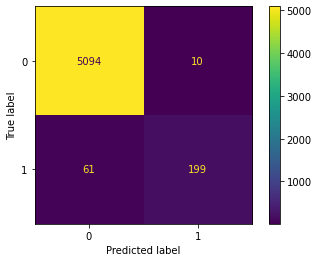

accuracy=0.9867636092468307
precision=0.9521531100478469
TPR=0.7653846153846153
TNR=0.9980407523510971


In [324]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_classes, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

[[tn, fp], [fn, tp]] =cm


accuracy = (tp+tn)/(tn+fp+fn+tp)
precision = tp/(tp+fp)
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)

print('accuracy={}'.format(accuracy))
print('precision={}'.format(precision))
print('TPR={}'.format(TPR))
print('TNR={}'.format(TNR))

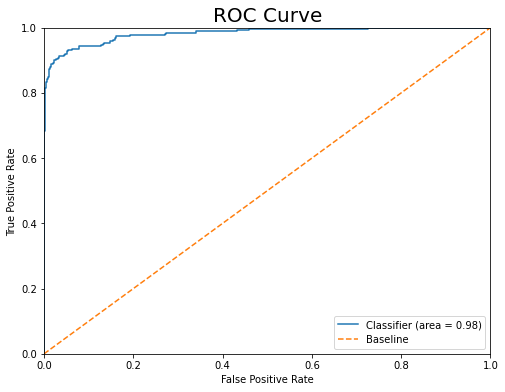

In [327]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=cnn_model.predict(test_data).ravel()
fpr, tpr, thresholds = roc_curve(test_classes, y_proba)
classifier_roc_auc = roc_auc_score(test_classes, y_proba)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()